#Unsupervised Learning







### 2nd April 2018





#### Team Members:
#### Prashant Wankhede 


For the following data sets, originating from the Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/):

    Iris (http://archive.ics.uci.edu/ml/datasets/Iris)


    K-means (Bonus if initializing with K-means++)
    Gaussian Mixture Model
    Hierarchical Clustering


    PCA
    Autoencoder (t-sne)


In [1]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\work\\Desktop\\DA\\iris.csv')
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,versicolor
142,5.8,2.7,5.1,1.9,virginica
87,6.3,2.3,4.4,1.3,versicolor
136,6.3,3.4,5.6,2.4,virginica
102,7.1,3.0,5.9,2.1,virginica


In [3]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     sepal_length  sepal_width  petal_length  petal_width
60            5.0          2.0           3.5          1.0
102           7.1          3.0           5.9          2.1
27            5.2          3.5           1.5          0.2
71            6.1          2.8           4.0          1.3
18            5.7          3.8           1.7          0.3
96     versicolor
123     virginica
60     versicolor
118     virginica
71     versicolor
Name: species, dtype: object


In [4]:
data["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [5]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
145,1.038005,-0.131979,0.819596,1.448832
38,-1.748856,-0.131979,-1.397064,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
78,0.189830,-0.362176,0.421734,0.395774


In [33]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, init='k-means++', random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.45994823920518646

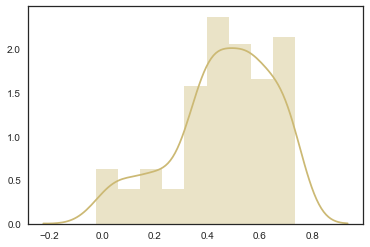

In [34]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores, color="y");

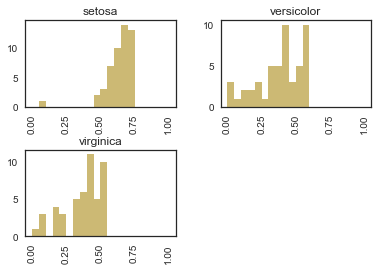

In [35]:

df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['species'] = data['species']
df_scores.hist(by='species', column='SilhouetteScore', range=(0,1.0), bins=20, color="y");

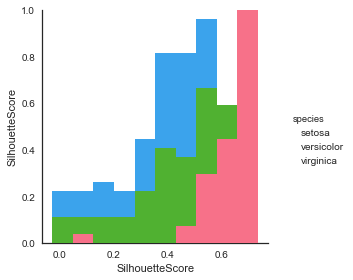

In [36]:
sns.pairplot(df_scores, hue="species",palette="husl", size=4);

In [11]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
46,-2.384733,1.120430
4,-2.389842,0.646835
33,-2.446177,2.150728
147,1.521170,0.269069
56,0.746530,0.773019


In [12]:
y_id_array = pd.Categorical.from_array(data['species']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['speciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,speciesId
116,1.471431,0.255622,2,2
113,1.260115,-1.162260,0,2
37,-2.527332,0.592293,1,0
93,-0.362183,-2.019238,0,1
77,1.358405,0.331312,2,1


In [43]:
def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, 
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), 
                     label = "%s %i" % (groupby, i), 
                     s=30)
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

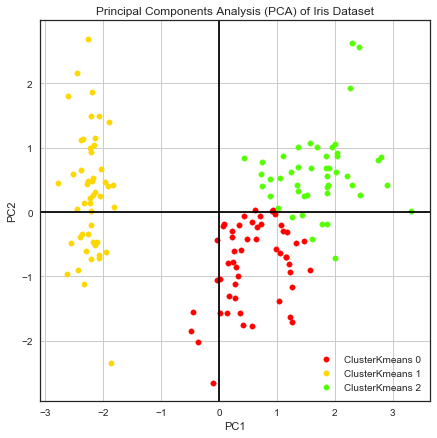

In [44]:
plotData(df_plot, 'ClusterKmeans')

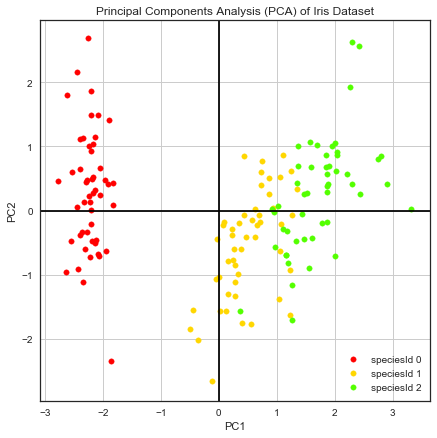

In [15]:
plotData(df_plot, 'speciesId')

In [16]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

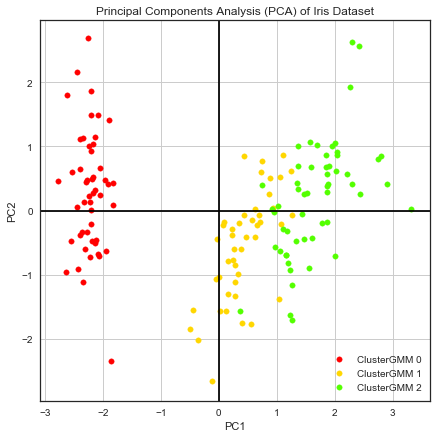

In [17]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

In [19]:
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124

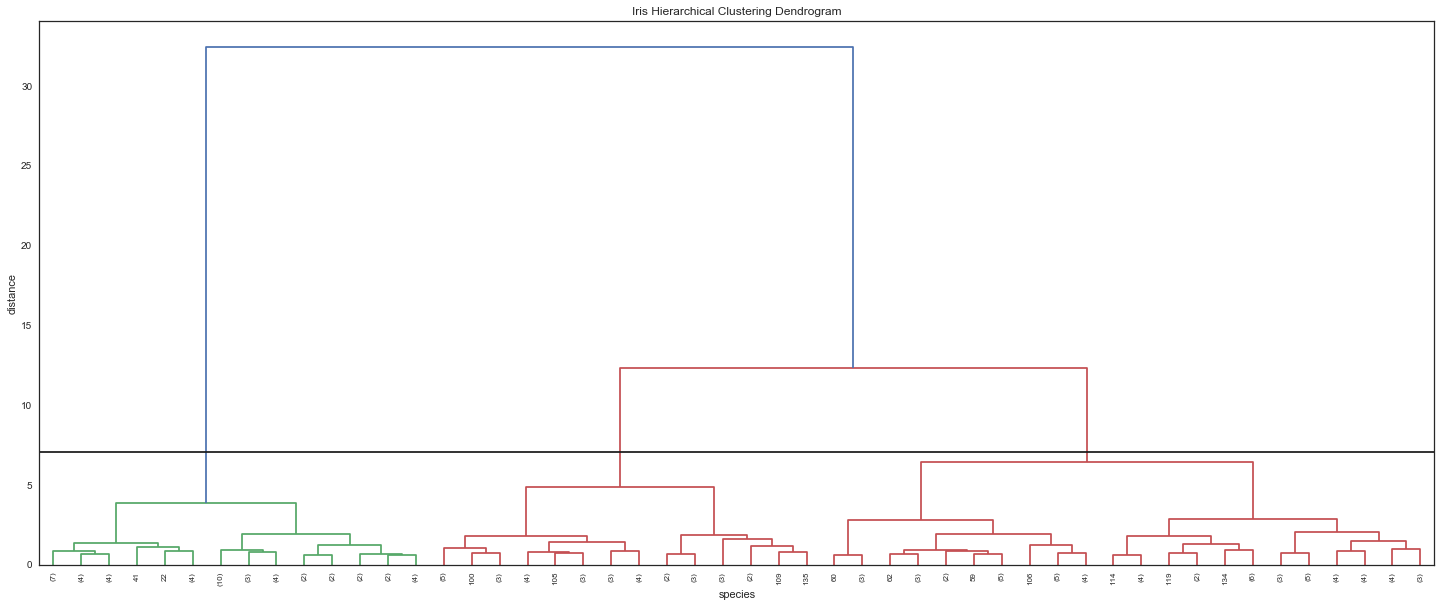

In [20]:
iris_SP = data[['sepal_length','sepal_width','petal_length','petal_width']]
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(iris_SP, 'ward')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [21]:
import tensorflow as tf
import math
from sklearn import datasets
from sklearn.manifold import TSNE
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
iris_dataset = datasets.load_iris()

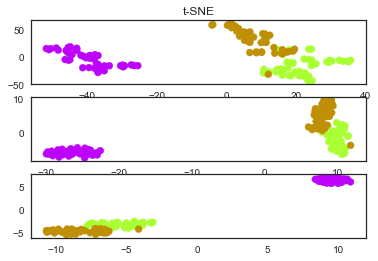

In [22]:
plt.close()
color_mapping = {0: sns.xkcd_rgb['bright purple'], 1: sns.xkcd_rgb['lime'], 2: sns.xkcd_rgb['ochre']}
colors = list(map(lambda x: color_mapping[x], iris_dataset.target))
model = TSNE(learning_rate=100, n_components=2, random_state=0, perplexity=5)
tsne5 = model.fit_transform(iris_dataset.data)

model = TSNE(learning_rate=100, n_components=2, random_state=0, perplexity=30)
tsne30 = model.fit_transform(iris_dataset.data)

model = TSNE(learning_rate=100, n_components=2, random_state=0, perplexity=50)
tsne50 = model.fit_transform(iris_dataset.data)

plt.figure(1)
plt.subplot(311)
plt.title('t-SNE', loc='center')
plt.scatter(tsne5[:, 0], tsne5[:, 1], c=colors)

plt.subplot(312)
plt.scatter(tsne30[:, 0], tsne30[:, 1], c=colors)

plt.subplot(313)
plt.scatter(tsne50[:, 0], tsne50[:, 1], c=colors)
plt.show()

In [23]:
plt.close()

def batch_generator(features, batch_size=50, n_epochs=1000):
    """
    Batch generator for the iris dataset
    """

    # Generate batches
    for epoch in range(n_epochs):
        start_index = 0
        while start_index != -1:
            # Calculate the end index of the batch to generate
            end_index = start_index + batch_size if start_index + batch_size < n else -1

            yield features[start_index:end_index]

            start_index = end_index


# Auto Encoder
class TF_AutoEncoder:
    def __init__(self, features, labels, dtype=tf.float32):
        self.features = features
        self.labels = labels
        self.dtype = dtype

        self.encoder = dict()

    def fit(self, n_dimensions):
        graph = tf.Graph()
        with graph.as_default():

            # Input variable
            X = tf.placeholder(self.dtype, shape=(None, self.features.shape[1]))

            # Network variables
            encoder_weights = tf.Variable(tf.random_normal(shape=(self.features.shape[1], n_dimensions)))
            encoder_bias = tf.Variable(tf.zeros(shape=[n_dimensions]))

            decoder_weights = tf.Variable(tf.random_normal(shape=(n_dimensions, self.features.shape[1])))
            decoder_bias = tf.Variable(tf.zeros(shape=[self.features.shape[1]]))

            # Encoder part
            encoding = tf.nn.sigmoid(tf.add(tf.matmul(X, encoder_weights), encoder_bias))

            # Decoder part
            predicted_x = tf.nn.sigmoid(tf.add(tf.matmul(encoding, decoder_weights), decoder_bias))

            # Define the cost function and optimizer to minimize squared error
            cost = tf.reduce_mean(tf.pow(tf.subtract(predicted_x, X), 2))
            optimizer = tf.train.AdamOptimizer().minimize(cost)

        with tf.Session(graph=graph) as session:
            # Initialize global variables
            session.run(tf.global_variables_initializer())

            for batch_x in batch_generator(self.features):
                self.encoder['weights'], self.encoder['bias'], _ = session.run([encoder_weights, encoder_bias, optimizer],
                                                                            feed_dict={X: batch_x})

    def reduce(self):
        return np.add(np.matmul(self.features, self.encoder['weights']), self.encoder['bias'])

Text(0.5,1,'Autoencoder')

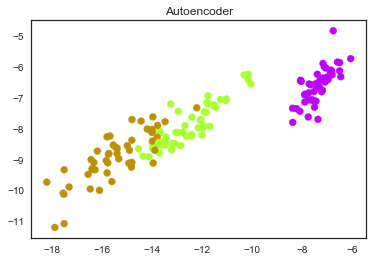

In [24]:
n = len(iris_dataset.data)
random_idx = np.random.permutation(n)
features, labels = iris_dataset.data[random_idx], iris_dataset.target[random_idx]

# Create an instance and encode
tf_ae = TF_AutoEncoder(features, labels)

tf_ae.fit(n_dimensions=2)

auto_encoded = tf_ae.reduce()

colors = list(map(lambda x: color_mapping[x], labels))

plt.scatter(auto_encoded[:, 0], auto_encoded[:, 1], c=colors)
plt.title('Autoencoder', loc='center')
